In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.stats import genextreme

In [2]:
os.chdir("/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/utils")
import dataset_copy

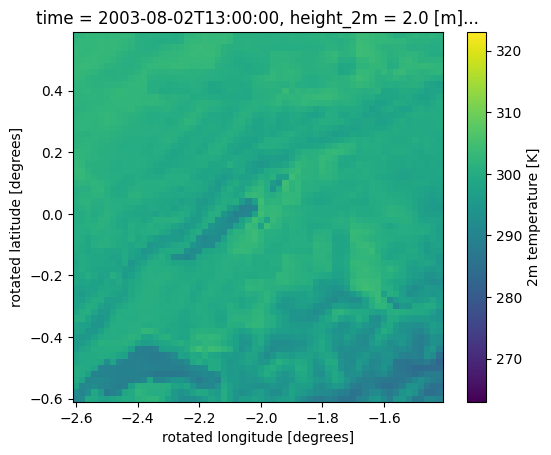

In [3]:
os.chdir("/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003")

filenames = dataset_copy.getfiles()
aout1=dataset_copy.new_dataset(filenames,213,214)
#aout2=dataset_copy.new_dataset(filenames, 224, 234)

#On s'intéresse aux données sur la suisse : 
lat_bnd = [-0.6, 0.58]
lon_bnd = [-2.6,-1.42]
aout1_re=aout1.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd))
aout1.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time = 13).plot(vmin = 263, vmax = 323)
plt.gca().set_aspect('equal')
plt.show()

aout1_re

In [20]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
nump=aout1_re['lat']
#print(nump)

In [4]:
aout1_re

<xarray.Dataset>
Dimensions:     (time: 24, rlon: 60, rlat: 60)
Coordinates:
  * time        (time) datetime64[ns] 2003-08-02 ... 2003-08-02T23:00:00
  * rlon        (rlon) float32 -2.6 -2.58 -2.56 -2.54 ... -1.46 -1.44 -1.42
  * rlat        (rlat) float32 -0.6 -0.58 -0.56 -0.54 ... 0.52 0.54 0.56 0.58
    lon         (rlat, rlon) float32 6.233 6.262 6.291 ... 7.836 7.866 7.896
    lat         (rlat, rlon) float32 46.34 46.34 46.34 ... 47.56 47.56 47.56
    height_2m   float32 2.0
    height_10m  float32 10.0
Data variables:
    T_2M        (time, rlat, rlon) float32 288.3 287.5 288.9 ... 293.5 293.2
    RELHUM_2M   (time, rlat, rlon) float32 72.97 76.98 76.6 ... 78.5 78.56 79.89
    TOT_PR      (time, rlat, rlon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

In [4]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/data"
os.chdir(path)
aout1=xr.open_dataset("aout_10_premier_jour.nc")

In [5]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/data"
os.chdir(path)
aout2=xr.open_dataset("aout_du_11_au_20.nc")

In [11]:
os.chdir("/work/FAC/FGSE/IDYST/tbeucler/downscaling/HadGEM_driven_COSMO/Present/2003")

filenames = dataset_copy.getfiles()
aout1=dataset_copy.new_dataset(filenames,213,223)

In [8]:
aout1_suisse=aout1.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd))

In [10]:
def save_dataset(ds, name) : # Saves the dataset
    """
    Saves the dataset under the filename name.
  
    Parameters:
        ds: Dataset that will be saved.
        
        name: Name of the saved dataset
    """
    
    path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/repos/Downscaling_CM/data"
    os.chdir(path)
    filename = './'+name+'.nc'
    print ('saving to ', filename)
    ds.to_netcdf(path=filename)
    ds.close()
    print ('finished saving')

In [9]:
save_dataset(aout, 'aout_du_11_au_20')

saving to  ./aout_du_11_au_20.nc
finished saving


In [11]:
aout1 = aout1.drop('lon')
aout2 = aout2.drop('lon')
aout1 = aout1.drop('lat')
aout2 = aout2.drop('lat')
aout=xr.concat([aout1, aout2], dim="time")

ValueError: These variables cannot be found in this dataset: ['lon']

In [12]:
save_dataset(aout, 'aout_du_1_au_20')

saving to  ./aout_du_1_au_20.nc
finished saving


In [6]:
def dataset_with_maximas_over_week(dataset) :
    """
    returns a xarray with coordinates : rlat, rlon and week; with variable : max_pr_weekly
    """
    weekly_data = dataset.resample(time='1W').max(dim='time')
    tot_pr_weekly = weekly_data['TOT_PR']
    max_pr_weekly = tot_pr_weekly.groupby('time.week').max(dim='time')
    year = dataset.time.dt.year
    result = xr.Dataset({'max_pr_weekly': max_pr_weekly})
    result = result.assign_coords(year=year)  # Ajouter l'année en tant que coordonnée
    print(result)
    return result

In [13]:
def dataset_with_maximas_over_week(dataset) :
    """
    returns a xarray with coordinates : rlat, rlon and week; with variable : max_pr_weekly
    """
    year = dataset.time.dt.year
    dataset=dataset.assign_coords(year=year)  # Ajouter l'année en tant que coordonnée
    weekly_data = dataset.resample(time='1W').max(dim='time')
    tot_pr_weekly = weekly_data['TOT_PR']
    max_pr_weekly = tot_pr_weekly.groupby('time.week').max(dim='time')
    result = xr.Dataset({'max_pr_weekly': max_pr_weekly})
    print(result)
    return result

In [14]:
dataset_with_maximas_over_week(aout)

<xarray.Dataset>
Dimensions:        (rlon: 1542, rlat: 1542, week: 4)
Coordinates:
  * rlon           (rlon) float32 -18.86 -18.84 -18.82 ... 11.92 11.94 11.96
  * rlat           (rlat) float32 -14.86 -14.84 -14.82 ... 15.92 15.94 15.96
    height_2m      float32 2.0
    height_10m     float32 10.0
  * week           (week) int64 31 32 33 34
Data variables:
    max_pr_weekly  (week, rlat, rlon) float32 0.0 0.0 ... 7.836e-05 7.838e-05


/work/FAC/FGSE/IDYST/tbeucler/downscaling/mberthier/dev_env/lib/python3.9/site-packages/xarray/core/accessor_dt.py:418: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


<xarray.Dataset>
Dimensions:        (rlon: 1542, rlat: 1542, week: 4)
Coordinates:
  * rlon           (rlon) float32 -18.86 -18.84 -18.82 ... 11.92 11.94 11.96
  * rlat           (rlat) float32 -14.86 -14.84 -14.82 ... 15.92 15.94 15.96
    height_2m      float32 2.0
    height_10m     float32 10.0
  * week           (week) int64 31 32 33 34
Data variables:
    max_pr_weekly  (week, rlat, rlon) float32 0.0 0.0 ... 7.836e-05 7.838e-05

In [19]:
import pandas as pd

def dataset_with_maximas_over_week(dataset):
    """
    returns a xarray with coordinates: rlat, rlon, week, and year; with variable: max_pr_weekly
    """
    year = dataset.time.dt.year
    dataset = dataset.assign_coords(year=year)  # Ajouter l'année en tant que coordonnée
    
    # Créer une variable "week" représentant la semaine
    week = dataset.time.dt.week
    
    # Créer un DataFrame pandas avec les coordonnées MultiIndex
    index = pd.MultiIndex.from_arrays([year, week], names=['year', 'week'])
    
    # Assigner les coordonnées MultiIndex au dataset
    dataset = dataset.assign_coords(week_year=index)
    
    weekly_data = dataset.resample(time='1W').max(dim='time')
    tot_pr_weekly = weekly_data['TOT_PR']
    
    # Regrouper les données par semaine et année, et calculer le maximum
    max_pr_weekly = tot_pr_weekly.groupby('week_year').max(dim='time')

    result = xr.Dataset({'max_pr_weekly': max_pr_weekly})
    print(result)
    return result


In [ ]:
def max_over_a_month_T(dataset,month,rlon,rlat,year,time_period,variable):
    """
    args : month = the month number
    time_period doit être time.hour, time.day, time.month ou time.year
    return the maxima over a month of accumulated precipitation over the time_period
    """
    dataset=dataset.isel(rlon=rlon,rlat=rlat)
    dataset_month=dataset.sel(time=(dataset['time.month'] == month) & (dataset['time.year']==year))
    dataset_month = dataset_month.groupby(time_period).sum(dim='time')
    return dataset_month[variable].max(dim='day')

In [ ]:
def block_maxima(dataset,month,rlon,rlat,nb_years,time_period):
    year=dataset['time.year'][0]
    maxima=[]
    for i in range(year,year+nb_years-1):
        maxima.append(max_over_a_month_T(dataset,month,rlon,rlat,i,time_period))
    return maxima

In [ ]:
def gev_parameters(maxima):
    params = genextreme.fit(max_delimited) #mu = params[0],sigma = params[1],xi = params[2]
    return params

In [ ]:
def variable_mean(dataset,begin_hour,end_hour):
  """
  return the mean of the three variable (T_2M, TOT_PR, RELHUM) between begin_hour and end_hour of the complete dataset
  ex : you have a weekly dataset and you want the mean of the temperature between 8h and 20h
  """
    dataset_selected_hours = dataset.sel(time=dataset.time.dt.hour.isin(range(begin_hour, end_hour)))
    return dataset_selected_hours.mean(dim='time')